In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from scipy import stats
from scipy.stats import randint, loguniform, uniform, chi2_contingency


### Load in Data


In [4]:
#df = pd.read_csv('data/investments_VC.csv', encoding = "ISO-8859-1")
df = pd.read_csv('../data/investments_VC.csv', encoding = "unicode_escape")

In [5]:
print(df.iloc[0])
df.head()

permalink                                    /organization/waywire
name                                                      #waywire
homepage_url                                http://www.waywire.com
category_list           |Entertainment|Politics|Social Media|News|
 market                                                      News 
 funding_total_usd                                      17,50,000 
status                                                    acquired
country_code                                                   USA
state_code                                                      NY
region                                               New York City
city                                                      New York
funding_rounds                                                 1.0
founded_at                                              2012-06-01
founded_month                                              2012-06
founded_quarter                                            201

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Basic Cleaning

In [6]:
# getting rid of extra spaces in market and funding_total_usd
df = df.rename(columns={' market ': 'market', 
                        ' funding_total_usd ': 'funding_total_usd'})

In [7]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [8]:
df = df.drop(columns=['permalink', 'homepage_url', 'category_list', 
                          'founded_quarter', 'post_ipo_equity',  
                          'post_ipo_debt', 'secondary_market'], 
                 axis=1)

In [9]:
# converting to float
df['funding_total_usd'][~df['funding_total_usd'].isnull()] = \
    [num.replace(" ", '').replace(",", '').replace("-", '') \
     for num in df['funding_total_usd'][~df['funding_total_usd'].isnull()]]

df['funding_total_usd'][df['funding_total_usd']==''] = 0

df['funding_total_usd'][~df['funding_total_usd'].isnull()] = \
[float(num) for num in df['funding_total_usd'][~df['funding_total_usd'].isnull()]]

C:\Users\annal\AppData\Local\Temp\ipykernel_25088\1152159077.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['funding_total_usd'][~df['funding_total_usd'].isnull()] = \
C:\Users\annal\AppData\Local\Temp\ipykernel_25088\1152159077.py:2

# TODO: mettere datatime in giorni

In [10]:
display(type(df['funding_total_usd'][0]))
display(df['funding_total_usd'][0])

float

1750000.0

### Dropping duplicates, if any:

In [11]:
df = df.drop_duplicates()

In [12]:
df['status'].value_counts()

status
operating    41829
acquired      3692
closed        2603
Name: count, dtype: int64

### Exploratory Analysis - Full Dataset

In [13]:
data = df

In [14]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 49439 entries, 0 to 49438
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   market                45470 non-null  object 
 2   funding_total_usd     49438 non-null  object 
 3   status                48124 non-null  object 
 4   country_code          44165 non-null  object 
 5   state_code            30161 non-null  object 
 6   region                44165 non-null  object 
 7   city                  43322 non-null  object 
 8   funding_rounds        49438 non-null  float64
 9   founded_at            38554 non-null  object 
 10  founded_month         38482 non-null  object 
 11  founded_year          38482 non-null  float64
 12  first_funding_at      49438 non-null  object 
 13  last_funding_at       49438 non-null  object 
 14  seed                  49438 non-null  float64
 15  venture               49

,name,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,...,private_equity,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,News,1750000.0,acquired,USA,NY,New York City,New York,1.0,2012-06-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,&TV Communications,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'Rock' Your Paper,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(In)Touch Network,Electronics,1500000.0,operating,GBR,NaN,London,London,1.0,2011-04-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-R- Ranch and Mine,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.describe()

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,49438.000000,38482.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.696205,2007.359129,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,1.628453e+05,2.074286e+06,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,1.294213,7.579203,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,5.612088e+06,3.167231e+07,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,18.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,3.500000e+09,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


In [16]:
data.isnull().sum()

name                        2
market                   3969
funding_total_usd           1
status                   1315
country_code             5274
state_code              19278
region                   5274
city                     6117
funding_rounds              1
founded_at              10885
founded_month           10957
founded_year            10957
first_funding_at            1
last_funding_at             1
seed                        1
venture                     1
equity_crowdfunding         1
undisclosed                 1
convertible_note            1
debt_financing              1
angel                       1
grant                       1
private_equity              1
product_crowdfunding        1
round_A                     1
round_B                     1
round_C                     1
round_D                     1
round_E                     1
round_F                     1
round_G                     1
round_H                     1
dtype: int64

In [17]:
data['founded_at'].head()

0    2012-06-01
1           NaN
2    2012-10-26
3    2011-04-01
4    2014-01-01
Name: founded_at, dtype: object

In [18]:
data['region'].value_counts()

region
SF Bay Area      6804
New York City    2577
Boston           1837
London           1588
Los Angeles      1389
                 ... 
Seychelles          1
Ludhiana            1
Salzburg            1
Belgaum             1
Jabalpur            1
Name: count, Length: 1089, dtype: int64

In [19]:
data['city'].value_counts()

city
San Francisco        2615
New York             2334
London               1257
Palo Alto             597
Austin                583
                     ... 
Wuxue                   1
Kyle                    1
Dayville                1
Woodbine                1
Connellys Springs       1
Name: count, Length: 4188, dtype: int64

In [20]:
data['state_code'].value_counts()

state_code
CA    9917
NY    2914
MA    1969
TX    1466
WA     974
      ... 
MB      13
AK      12
NB       8
SK       4
PE       2
Name: count, Length: 61, dtype: int64

In [21]:
data['country_code'].value_counts()

country_code
USA    28793
GBR     2642
CAN     1405
CHN     1239
DEU      968
       ...  
MUS        1
SOM        1
CIV        1
SYC        1
MAF        1
Name: count, Length: 115, dtype: int64

In [22]:
# inspecting market feature - lots of catgories
print("Number of unique markets: ", len(set(data['market'])))
print("Markets with more than 200 companies: ",      
      str(sum(data['market'].value_counts() >= 200)))

Number of unique markets:  754
Markets with more than 200 companies:  39


<Axes: ylabel='market'>

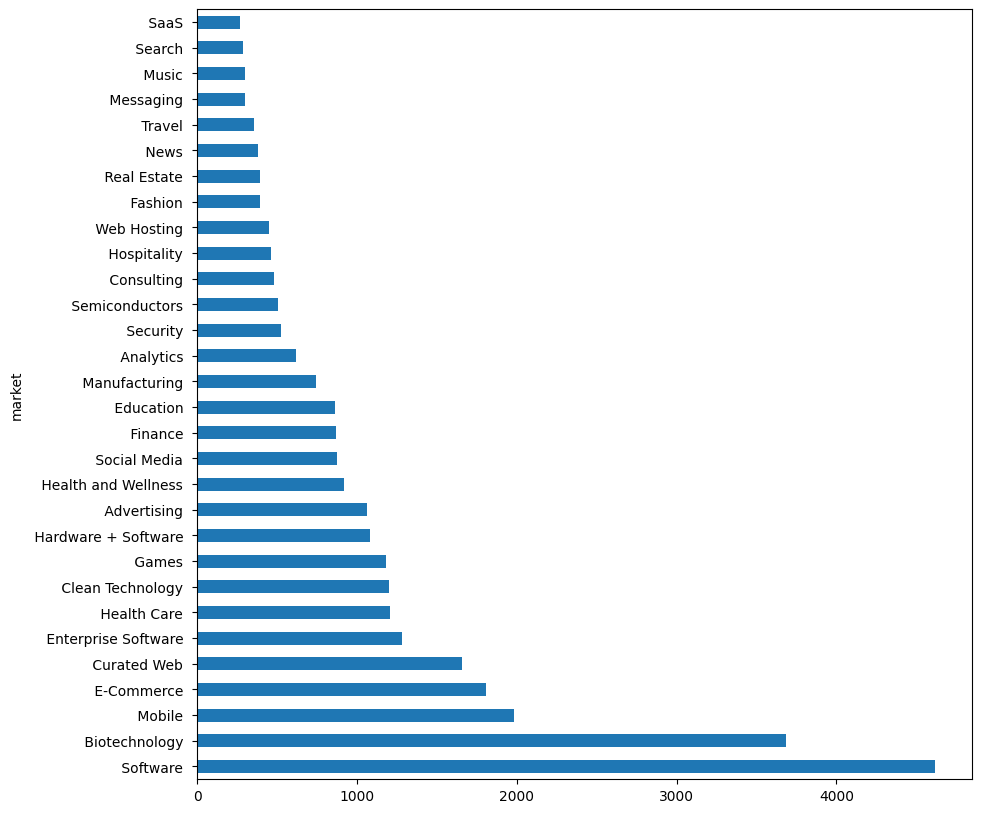

In [23]:
fig, ax = plt.subplots(figsize = (10,10))
data['market'].value_counts()[:30].plot(kind='barh')

In [24]:
# same deal with region
print("Number of unique regions: ", len(set(data['region'])))
print("Regions with more than 200 companies: ",      
      str(sum(data['region'].value_counts() >= 200)))

Number of unique regions:  1090
Regions with more than 200 companies:  44


<Axes: ylabel='region'>

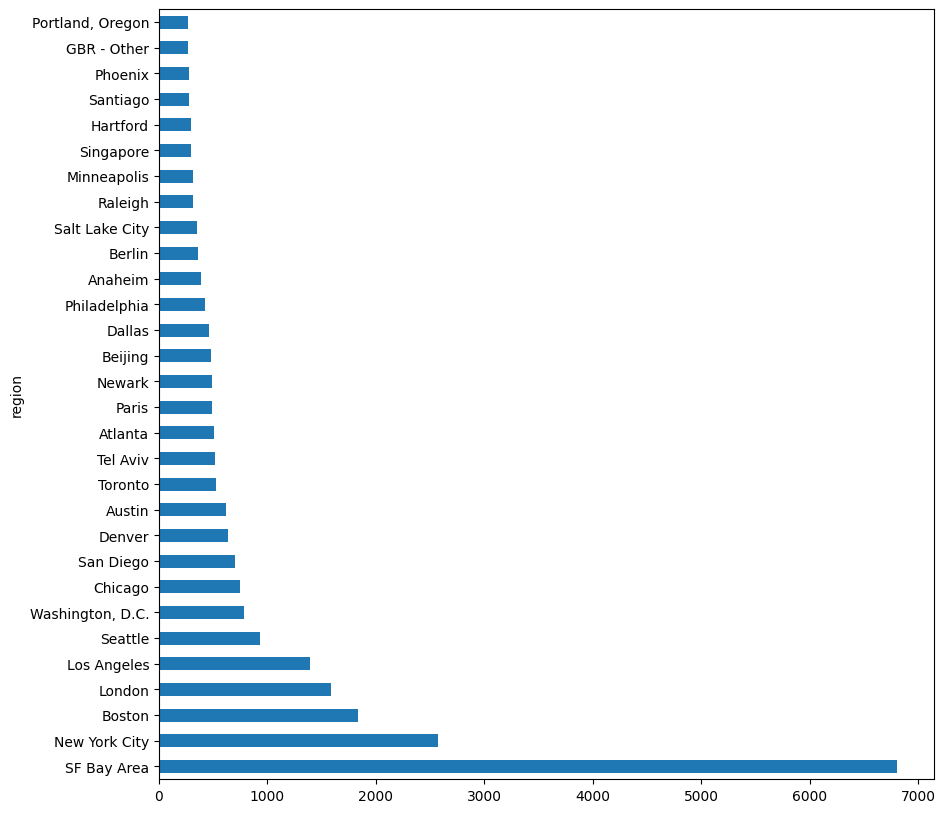

In [25]:
fig, ax = plt.subplots(figsize = (10,10))
data['region'].value_counts()[:30].plot(kind='barh')

#TODO vedere come sono le distribuzioni a seconda che siano chiuse o acquisite

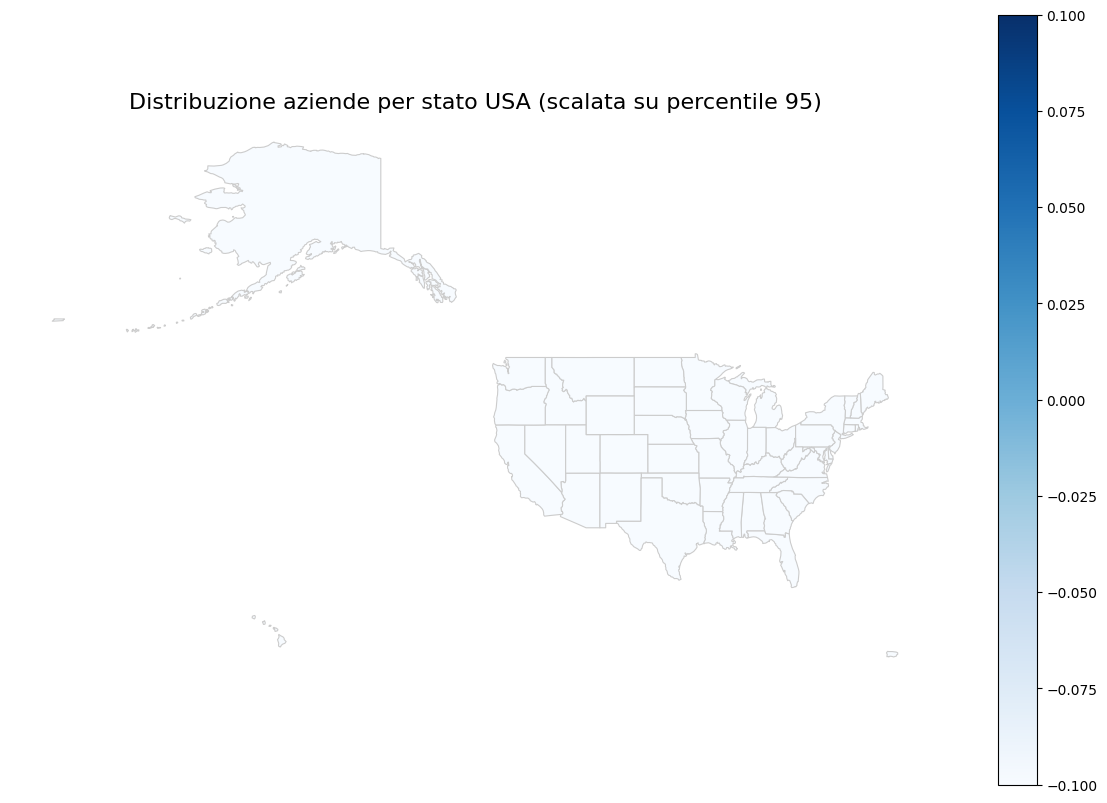

In [33]:
import numpy as np

# Calcolo min e massimo dinamici ma "contenuti"
vmin = choropleth['count'].min()
vmax = np.percentile(choropleth['count'], 95)  # tagliamo gli outlier in alto

# Plot
fig, ax = plt.subplots(figsize=(15, 10))
choropleth.plot(
    column='count',
    cmap='Blues',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=ax,
    vmin=vmin,
    vmax=vmax
)
plt.title('Distribuzione aziende per stato USA (scalata su percentile 95)', fontsize=16)
plt.axis('off')
plt.show()


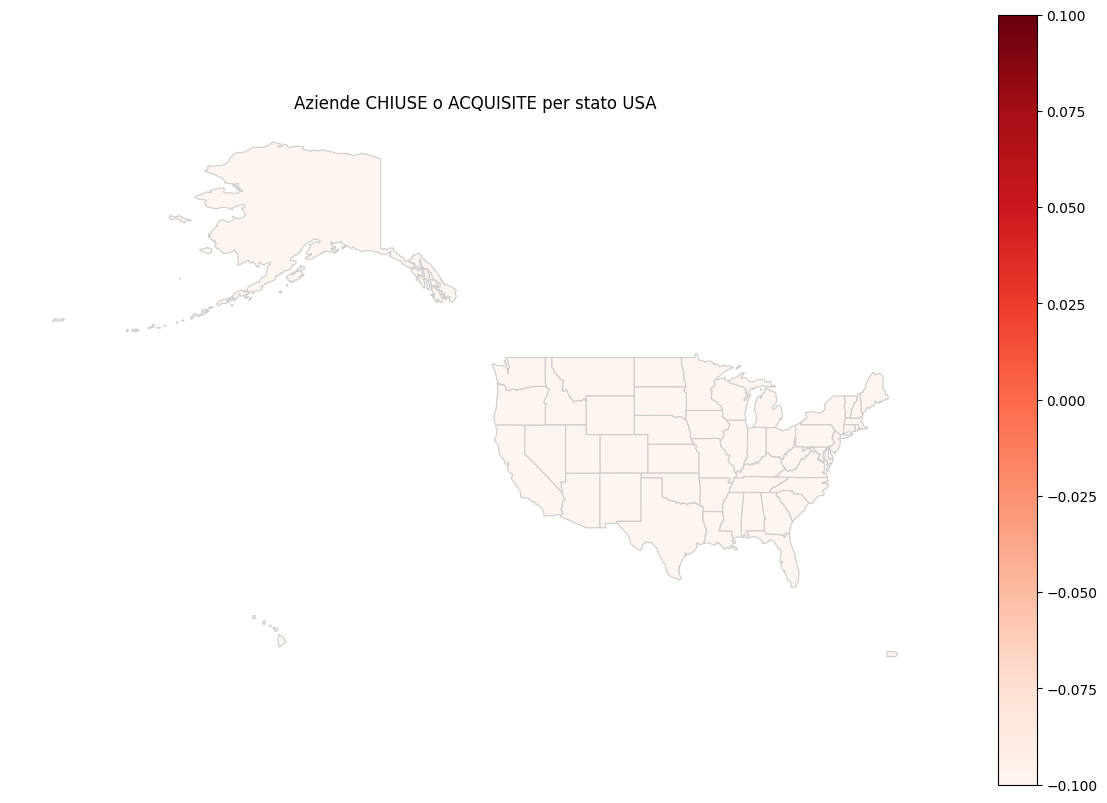

In [28]:
# Filtro
closed_or_acquired = data[data['status'].isin(['closed', 'acquired'])]

# Conta per stato
state_counts_ca = closed_or_acquired['state_code'].value_counts().reset_index()
state_counts_ca.columns = ['state_code', 'count']

# Merge
choropleth_ca = us_states.merge(state_counts_ca, on='state_code', how='left')
choropleth_ca['count'] = choropleth_ca['count'].fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(15, 10))
choropleth_ca.plot(column='count', cmap='Reds', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)
plt.title('Aziende CHIUSE o ACQUISITE per stato USA')
plt.axis('off')
plt.show()


In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Carica la mappa del mondo da un GeoJSON disponibile online
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")

# Count the number of acquired startups per country
acquired_startups = data[data['status'] == 'acquired']['country_code'].value_counts()

# Map the counts to the world map
# Ensure the country codes in acquired_startups match those in world['iso_a3']
acquired_startups = acquired_startups.rename_axis('iso_a3').reset_index()

# Merge the acquired_startups data with the world GeoDataFrame
world = world.merge(acquired_startups, how='left', left_on='iso_a3', right_on='iso_a3')

# Fill NaN values with 0 for countries with no acquired startups
world['count'] = world['count'].fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='acquired_startups', ax=ax, legend=True, 
           legend_kwds={'label': "Number of Acquired Startups", 'orientation': "horizontal"},
           cmap='OrRd')
plt.title('World Map of Acquired Startups by Country')
plt.show()

KeyError: 'iso_a3'

In [ ]:
# Count the number of acquired startups per country
acquired_startups = data[data['status'] == 'acquired']['country_code'].value_counts()
print(acquired_startups)

country_code
USA    2785
GBR     141
CAN     103
DEU      73
ISR      60
FRA      47
CHN      25
ESP      24
IRL      17
IND      17
NLD      14
DNK      13
ITA      12
SWE      12
AUS      12
FIN      11
CHE      11
BEL       9
JPN       9
SGP       7
NOR       6
BRA       5
RUS       5
AUT       5
KOR       5
ARG       4
ARE       4
CHL       4
TUR       3
BGR       3
MEX       2
LTU       2
ZAF       2
MYS       2
HUN       2
CZE       2
PRT       2
GRC       2
POL       1
THA       1
LVA       1
NZL       1
COL       1
URY       1
LBN       1
LUX       1
BMU       1
MAF       1
Name: count, dtype: int64


array([[<Axes: title={'center': 'equity_crowdfunding'}>]], dtype=object)

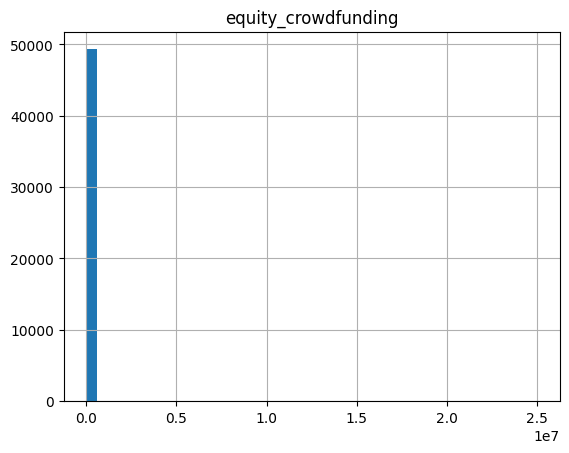

In [ ]:

data.hist('equity_crowdfunding', bins=40) 
# there are some very skewed columns in the funding area

### Preprocessing & Feature Engineering

In [ ]:
data.columns

Index(['name', 'market', 'funding_total_usd', 'status', 'country_code',
       'state_code', 'region', 'city', 'funding_rounds', 'founded_at',
       'founded_month', 'founded_year', 'first_funding_at', 'last_funding_at',
       'seed', 'venture', 'equity_crowdfunding', 'undisclosed',
       'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

### Missing Values
I am removing rows with missing status or company name.
I am also dropping rows with a missing founded_year because this feature has high importance in many of the models & thus would prefer not to impute at risk of skewing the model. I tried both dropping and keeping the missing founded_years (imputed). The proportion of companies in each status category & model results are fairly similar with & without imputing the median of year so I am comfortable dropping these rows.

In [ ]:
data = data.dropna(subset=['status', 'name', 'founded_year'])
data.isnull().sum()

name                        0
market                   1801
funding_total_usd           0
status                      0
country_code             2936
state_code              13332
region                   2936
city                     3357
funding_rounds              0
founded_at                  0
founded_month               0
founded_year                0
first_funding_at            0
last_funding_at             0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C                     0
round_D                     0
round_E                     0
round_F                     0
round_G                     0
round_H                     0
dtype: int64

In [ ]:
len(data)

37563

In [ ]:
# filling categoricals
data = data.fillna(value={'market': 'other', 'country_code': 'other', 
                          'region': 'other', 'city': 'other', 
                          'state_code': 'other'})

10th percentile of founded_year:  2000.0
Num Rows before 2000:  3518


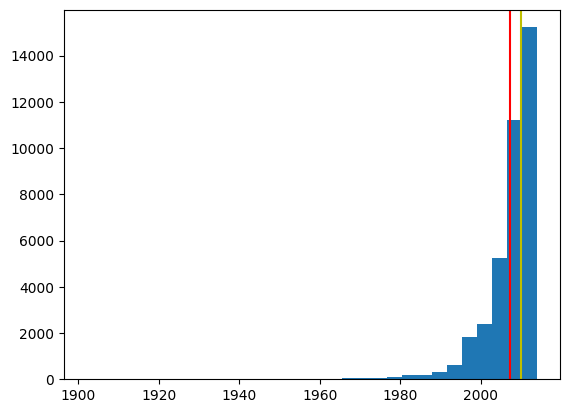

In [ ]:
# distribution of non NA years 
plt.hist(data['founded_year'][~data['founded_year'].isnull()], bins=30)
plt.axvline(x=np.nanmean(data['founded_year']), color='r')
plt.axvline(x=np.nanmedian(data['founded_year']), color='y')

p10 = np.percentile(data['founded_year'][~data['founded_year'].isnull()], 10)
print("10th percentile of founded_year: ", p10)

#10th percentile year is 2000, we will subset for startups founded on or after 2000
print("Num Rows before 2000: ", len(data[data['founded_year'] < 2000]))
data = data[data['founded_year'] >= 2000].reset_index(drop=True)

In [ ]:
len(df[(df['founded_year'] < 2000) & (df['status'] != 'operating')])

838

Date data - convert to datetime:

In [ ]:
data['founded_at'] = [datetime.strptime(day, '%Y-%m-%d') for day \
                      in data['founded_at'][~data['founded_at'].isnull()]]
data['first_funding_at'] = [datetime.strptime(day, '%Y-%m-%d').date() for day \
                            in data['first_funding_at']]
data['last_funding_at'] = [datetime.strptime(day, '%Y-%m-%d').date() for day \
                            in data['last_funding_at']]
data['founded_month'] = [datetime.strptime(mth, "%Y-%m").month for mth in data['founded_month']]

Fill year & founded_at with simple imputer (only if not removing NaN rows). Since the data is skewed (see plot above), we will use median rather than mean.

In [ ]:
# uncomment the below to impute founded_year with mean, only if we are not 
# dropping nans for this feature

#imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

#data['founded_year'] = imp_median.fit_transform(data[['founded_year']])
#data['founded_at'] = imp_median.fit_transform(data[['founded_at']])

In [ ]:
data['founded_at'] = pd.to_datetime(data['founded_at'])
data['founded_year'] = [day.year for day in data['founded_at']]

In [ ]:
data['founded_at'].value_counts()

founded_at
2012-01-01    2100
2011-01-01    2096
2010-01-01    1810
2009-01-01    1561
2013-01-01    1535
              ... 
2011-04-03       1
2000-08-09       1
2009-08-07       1
2014-05-25       1
2007-01-21       1
Name: count, Length: 2935, dtype: int64

In [ ]:
data.isna().sum()

name                    0
market                  0
funding_total_usd       0
status                  0
country_code            0
state_code              0
region                  0
city                    0
funding_rounds          0
founded_at              0
founded_month           0
founded_year            0
first_funding_at        0
last_funding_at         0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H                 0
dtype: int64

Basic data cleaning:

In [ ]:
# getting rid of extra spaces in market, city, state code, region
data['market'] = [x.strip() for x in data['market']]
data['country_code'] = [x.strip() for x in data['country_code']]
data['state_code'] = [x.strip() for x in data['state_code']]
data['region'] = [x.strip() for x in data['region']]
data['city'] = [x.strip() for x in data['city']]

In [ ]:
data.dtypes

name                            object
market                          object
funding_total_usd               object
status                          object
country_code                    object
state_code                      object
region                          object
city                            object
funding_rounds                 float64
founded_at              datetime64[ns]
founded_month                    int64
founded_year                     int64
first_funding_at                object
last_funding_at                 object
seed                           float64
venture                        float64
equity_crowdfunding            float64
undisclosed                    float64
convertible_note               float64
debt_financing                 float64
angel                          float64
grant                          float64
private_equity                 float64
product_crowdfunding           float64
round_A                        float64
round_B                  

In [ ]:
# need to convert this data type to integer
data['funding_total_usd'].value_counts()

In [ ]:
display(data.iloc[0])

#### Feature Engineering


In [ ]:
# creating column that labels country as USA or Other
data['USA_or_international'] = [0 if country=='USA' else 1 for country in data['country_code']]

In [ ]:
#count the USA or international
data['USA_or_international'].value_counts()
# 0 = USA, 1 = International

USA_or_international
0    20664
1    13376
Name: count, dtype: int64

In [ ]:
#List of European country codes
european_countries = ['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE', 'GBR']

#Creating the column to rank countries
data['european_or_international'] = [0 if country in european_countries else 1 for country in data['country_code']]

In [ ]:
#count the european_or_international column
data['european_or_international'].value_counts()


european_or_international
1    28807
0     5233
Name: count, dtype: int64

In [ ]:
# creating temporary columns to aid in calculation of time to first funding

data['founded_at_temp'] = [day.date() for day in data['founded_at']]
data['founded_at_temp'] = pd.to_datetime(data['founded_at_temp'], 
                                         format = '%Y-%m-%d')

data['first_funding_at_temp'] = pd.to_datetime(data['first_funding_at'], 
                                               format = '%Y-%m-%d', 
                                               errors='coerce')
data['last_funding_at_temp'] = pd.to_datetime(data['last_funding_at'], 
                                              format = '%Y-%m-%d', 
                                              errors='coerce')

data['time_to_first_funding'] = (data['first_funding_at_temp'] - \
                                 data['founded_at_temp']) / pd.Timedelta(days=365)

data['time_first_to_last_funding'] = (data['last_funding_at_temp'] - \
                                      data['first_funding_at_temp']) / pd.Timedelta(days=365)

In [ ]:
# checking for nulls
print(data['first_funding_at'][data['time_to_first_funding'].isnull()])
print(data['last_funding_at'][data['time_first_to_last_funding'].isnull()])

1030     0020-06-14
4514     0019-11-20
9863     0201-01-01
20287    0007-05-13
21784    0001-05-14
Name: first_funding_at, dtype: object
1030     2013-06-01
4514     2013-04-01
9863     0201-01-01
20287    2014-09-25
21784    0001-05-14
Name: last_funding_at, dtype: object


In [ ]:
# dropping these
data = data.dropna(subset=['time_to_first_funding'])

#### Outliers

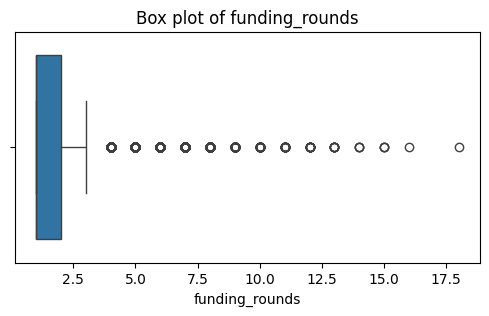

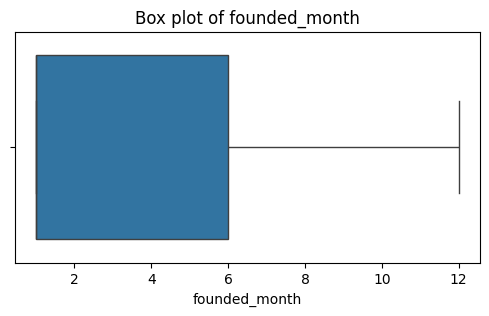

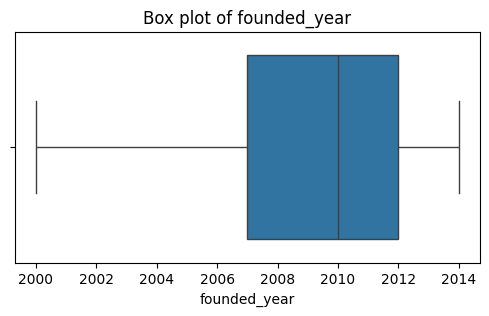

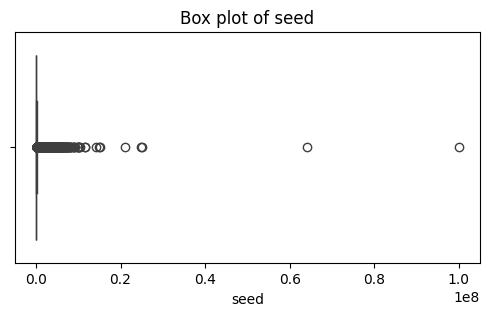

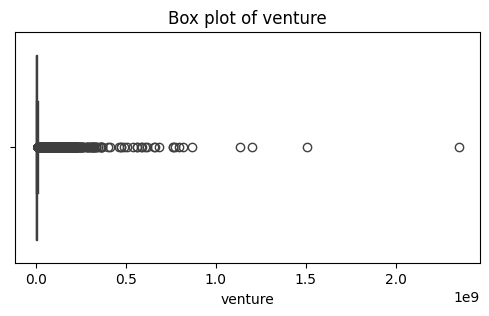

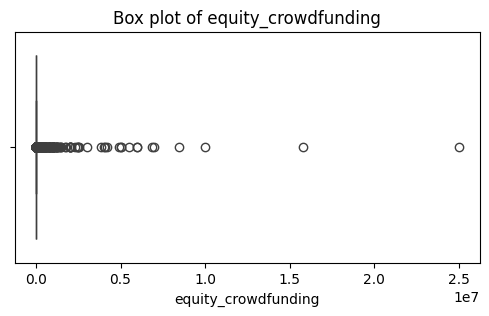

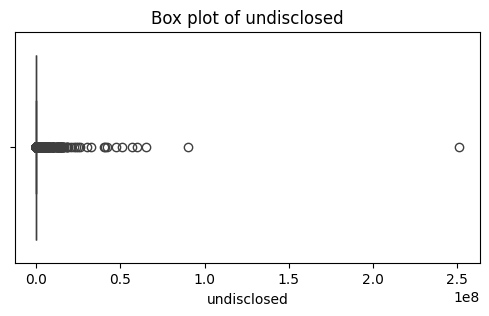

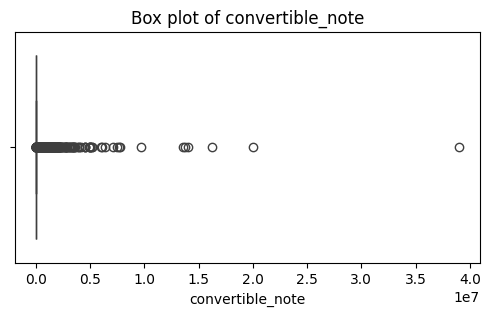

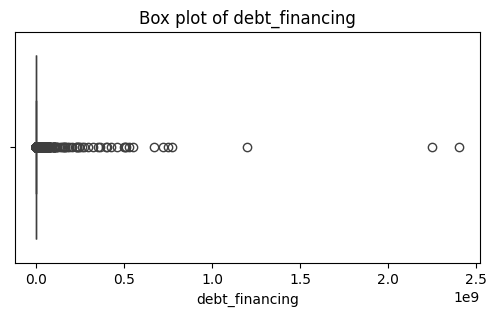

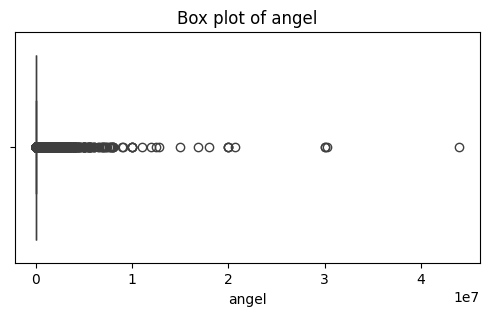

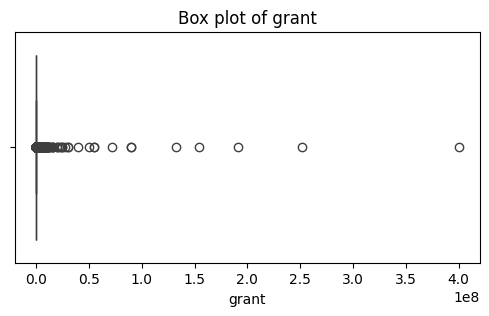

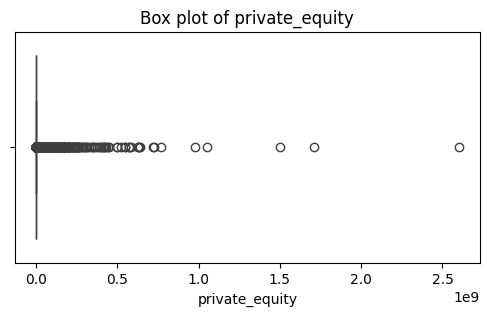

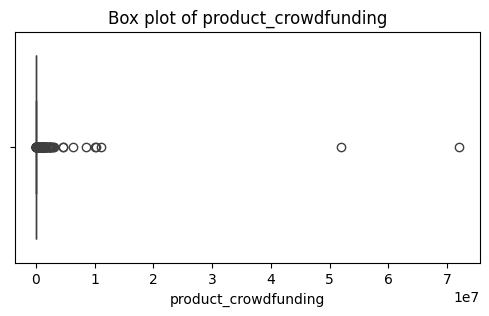

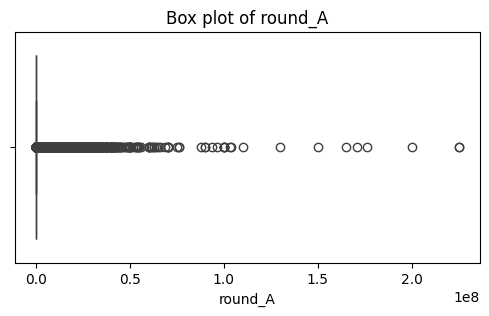

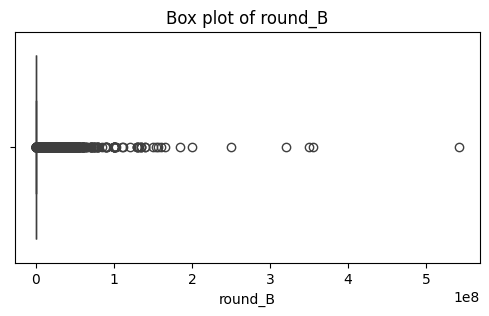

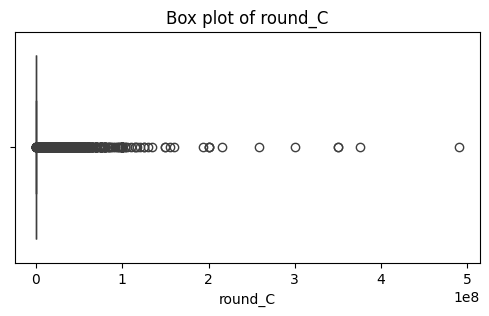

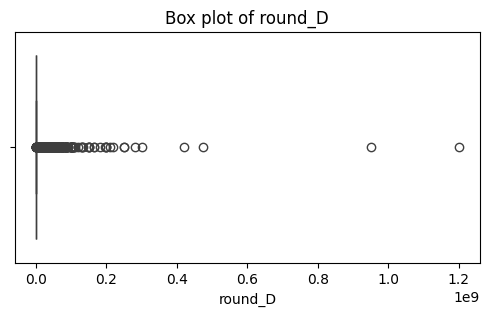

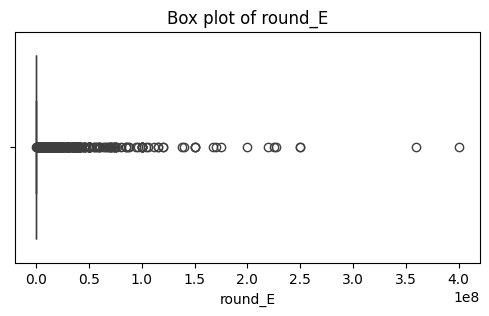

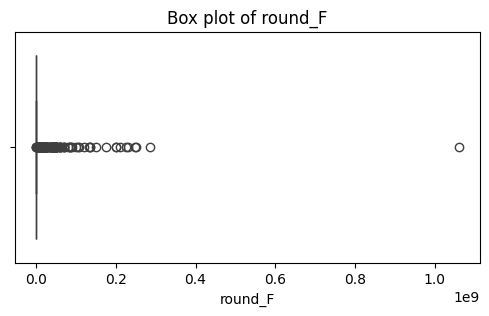

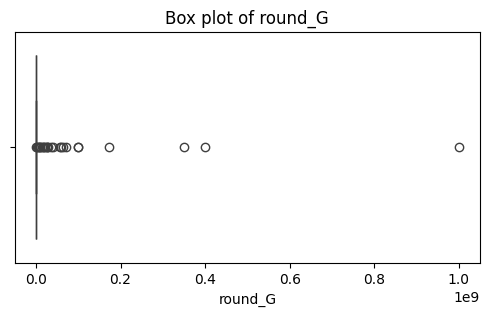

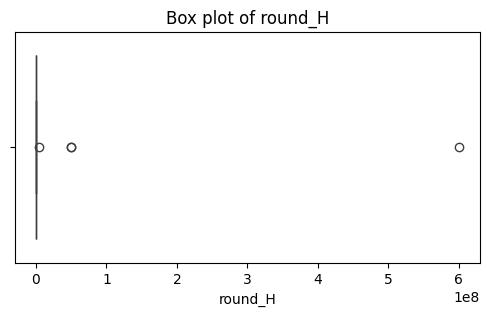

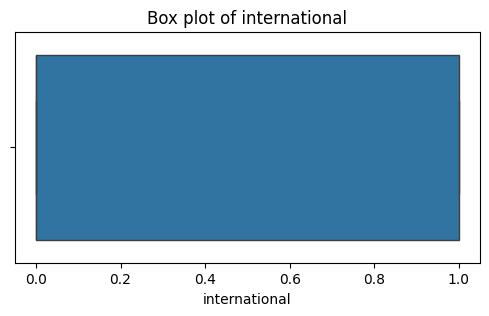

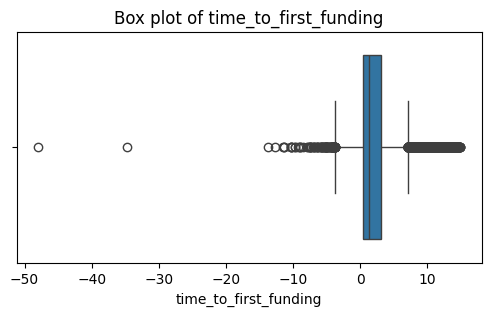

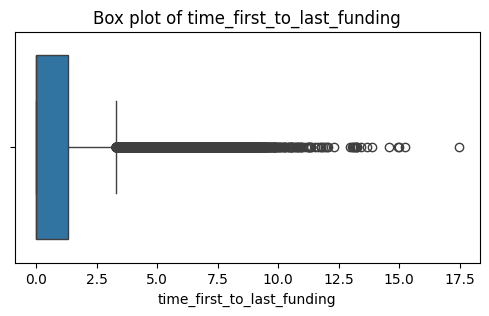

In [ ]:
# Filter out non-numeric columns if necessary
numeric_cols = data.select_dtypes(include=['float64', 'int64'])

# Plot box plots for each numeric variable
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [ ]:
cutoffs = {
    'equity_crowdfunding': 3e6,  # $2 million
    'product_crowdfunding': 3e6,  # $2 million
    'undisclosed': 20e6,  # $15 million
    'venture': 50e6,  # $50 million
    'grant': 5e6,  # $5 million
    'private_equity': 300e6,  # $250 million
    'convertible_note': 5e6,  # $5 million
    'angel': 5e6,  # $5 million
    'seed': 10e6,  # $10 million
    'round_A': 20e6,  # $20 million
    'round_B': 30e6,  # $30 million
    'round_C': 40e6,  # $40 million
    'round_D': 60e6,  # $60 million
    'round_E': 80e6,  # $80 million
    'round_F': 100e6,  # $100 million
}

original_data_count = data.shape[0]

# Applying the updated cutoff thresholds and updating the dataframe
for funding_type, cutoff in cutoffs.items():
    df_clean = data[data[funding_type] <= cutoff]

print(f"Original Data: {original_data_count} rows")
print(f"Data shape after removing high funding outliers: {df_clean.shape}")

Original Data: 34045 rows
Data shape after removing high funding outliers: (34028, 32)


In [ ]:
# Outlier analysis for funding_rounds
Q1_funding_rounds = df_clean['funding_rounds'].quantile(0.25)
Q3_funding_rounds = df_clean['funding_rounds'].quantile(0.75)
IQR_funding_rounds = Q3_funding_rounds - Q1_funding_rounds

# Define outliers as those beyond 1.5 times the IQR from the Q1 and Q3
outliers_IQR_funding_rounds = df_clean[(df_clean['funding_rounds'] < (Q1_funding_rounds - 1.5 * IQR_funding_rounds)) | (df_clean['funding_rounds'] > (Q3_funding_rounds + 1.5 * IQR_funding_rounds))]

# Calculate Z-scores to identify outliers
z_scores_funding_rounds = np.abs(stats.zscore(df_clean['funding_rounds']))
outliers_Z_funding_rounds = df_clean[z_scores_funding_rounds > 3]

# Display the number of outliers detected by each method
outliers_IQR_count_funding_rounds = outliers_IQR_funding_rounds.shape[0]
outliers_Z_count_funding_rounds = outliers_Z_funding_rounds.shape[0]

# Print the number of outliers detected by each method
print(f"Number of outliers detected by the IQR method: {outliers_IQR_count_funding_rounds}")
print(f"Number of outliers detected by the Z-score method: {outliers_Z_count_funding_rounds}")

Number of outliers detected by the IQR method: 3410
Number of outliers detected by the Z-score method: 933


C:\Users\annal\AppData\Local\Temp\ipykernel_15392\777241978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=funding_rounds_counts.index, y=funding_rounds_counts.values, palette='viridis')


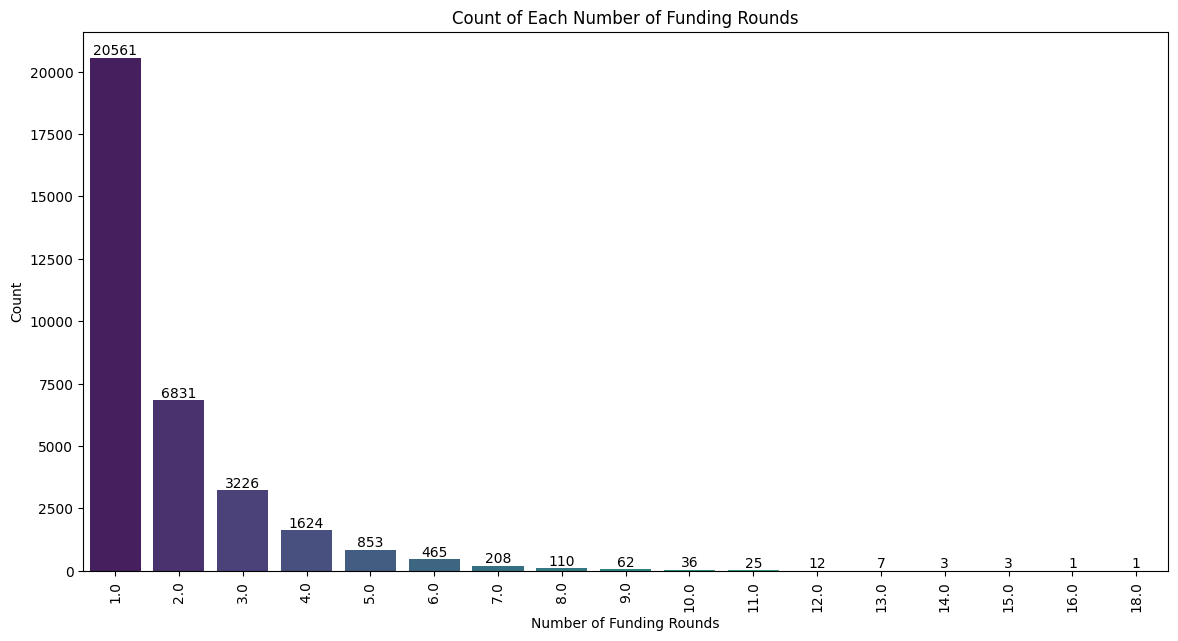

In [ ]:
funding_rounds_counts = df_clean['funding_rounds'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(14, 7))
sns.barplot(x=funding_rounds_counts.index, y=funding_rounds_counts.values, palette='viridis')

# Annotate the bars with the exact counts
for i, count in enumerate(funding_rounds_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Count of Each Number of Funding Rounds')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate the x labels if they overlap
plt.show()

In [ ]:
''' 
Function to perform train_test_split and necessary preprocessing / scaling
'''

def train_test_preprocess(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    # check that there are the same number of rows in X as values in y
    assert X_train.shape[0] == y_train.shape[0]
    
    # Categorizing features in preparation for scaling / encoding
    X_train_cat_eng = X_train.select_dtypes(include=['int64']).reset_index(drop=True)
    X_test_cat_eng = X_test.select_dtypes(include=['int64']).reset_index(drop=True)

    X_train_cont = X_train.select_dtypes(exclude=['object','int64']).reset_index(drop=True)
    X_test_cont = X_test.select_dtypes(exclude=['object','int64']).reset_index(drop=True)

    cat_columns = ['market', 'region']
    cat_train = X_train[cat_columns].reset_index(drop=True)
    cat_test = X_test[cat_columns].reset_index(drop=True)

    # Scale continuous variables using Min Max Scaler:
    scaler = MinMaxScaler() # instantiate MinMaxScaler

    ## TRAIN
    # Fit and transform X_train
    X_train_cont_scaled = scaler.fit_transform(X_train_cont)
    X_train_cont_scaled = pd.DataFrame(X_train_cont_scaled, columns=X_train_cont.columns)

    # One hot encode categoricals
    ohe = OneHotEncoder(handle_unknown = 'ignore')
    encoded_train = ohe.fit_transform(cat_train).toarray()
    X_train_cat = pd.DataFrame(encoded_train, columns=ohe.get_feature_names(cat_train.columns))

    # Putting it all together:
    X_train_processed = pd.concat([X_train_cat, X_train_cont, X_train_cat_eng], axis=1)
    X_train_scaled = pd.concat([X_train_cat, X_train_cont_scaled, X_train_cat_eng], axis=1) 

    ## TEST
    # Scale continuous features
    X_test_cont_scaled = scaler.transform(X_test_cont)
    X_test_cont_scaled = pd.DataFrame(X_test_cont_scaled, columns=X_test_cont.columns)

    # One hot encoding categoricals
    encoded_test = ohe.transform(cat_test).toarray()
    X_test_cat = pd.DataFrame(encoded_test, columns=ohe.get_feature_names(cat_test.columns))

    # Putting it all together
    X_test_scaled = pd.concat([X_test_cat, X_test_cont_scaled, X_test_cat_eng], axis=1)
    X_test_processed = pd.concat([X_test_cat, X_test_cont, X_test_cat_eng], axis=1)
    
    return X_train_processed, X_train_scaled, X_test_processed, X_test_scaled, y_train, y_test
